In [14]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from empiricaldist import Pmf

In [4]:
df=pd.read_csv('step2_output.csv')

In [5]:
df

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,...,1.0,1610.0,113.0,150.000000,60.0,669.0,65.000000,85.00000,150.000000,550.0
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,...,2.0,640.0,60.0,45.000000,44.0,350.0,47.000000,53.00000,90.000000,0.0
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,...,1.0,30.0,30.0,150.000000,36.0,69.0,30.000000,34.00000,152.000000,30.0
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,...,2.0,777.0,104.0,122.000000,81.0,260.0,89.000000,89.00000,122.000000,0.0
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,...,1.2,800.0,80.0,115.000000,49.0,250.0,74.000000,78.00000,104.000000,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325,Meadowlark Ski Lodge,Wyoming,Wyoming,9500,1000,8500,0,0.0,0,...,1.5,300.0,0.0,115.103943,9.0,384.5,57.916957,64.16681,120.053004,0.0
326,326,Sleeping Giant Ski Resort,Wyoming,Wyoming,7428,810,6619,0,0.0,0,...,1.0,184.0,18.0,61.000000,81.0,310.0,42.000000,42.00000,77.000000,0.0
327,327,Snow King Resort,Wyoming,Wyoming,7808,1571,6237,0,0.0,0,...,1.0,400.0,250.0,121.000000,80.0,300.0,59.000000,59.00000,123.000000,110.0
328,328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming,9663,990,8798,0,0.0,0,...,0.7,75.0,30.0,131.000000,59.0,250.0,49.000000,49.00000,120.053004,0.0


In [6]:
df.count()

Unnamed: 0           330
Name                 330
Region               330
state                330
summit_elev          330
vertical_drop        330
base_elev            330
trams                330
fastEight            330
fastSixes            330
fastQuads            330
quad                 330
triple               330
double               330
surface              330
total_chairs         330
Runs                 330
TerrainParks         330
LongestRun_mi        330
SkiableTerrain_ac    330
Snow Making_ac       330
daysOpenLastYear     330
yearsOpen            330
averageSnowfall      330
AdultWeekday         330
AdultWeekend         330
projectedDaysOpen    330
NightSkiing_ac       330
dtype: int64

In [7]:
dfg=df.groupby(['Region']).sum()

In [33]:
dfg.reset_index()

,Region,Unnamed: 0,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alaska,3,8629,4334,3246,1,0.0,0,2,2,...,4.0,2280.000000,203.0,345.000000,140.0,1088.0,142.000000,172.00000,392.000000,580.0
1,Arizona,7,22600,4100,18400,0,0.0,1,1,4,...,3.2,1577.000000,184.0,237.000000,130.0,510.0,163.000000,167.00000,226.000000,80.0
2,Colorado,803,253787,54997,199462,15,0.0,18,88,18,...,59.8,68682.000000,6167.0,3258.000000,1325.0,6675.0,1733.335652,1783.33448,3160.053004,428.0
3,Connecticut,250,4650,2550,2100,0,0.0,0,0,0,...,3.5,358.000000,339.0,468.103943,294.0,367.0,239.000000,284.00000,580.000000,256.0
4,Idaho,702,88982,21850,67150,2,0.0,1,17,3,...,21.3,16396.000000,1199.0,1366.207885,742.0,3480.0,682.750870,687.33362,1529.212014,415.0
5,Illinois,266,2830,1017,1813,0,0.0,0,0,5,...,1.2,191.000000,191.0,336.103943,209.0,137.0,162.916957,194.16681,338.000000,191.0
6,Indiana,139,1700,700,1000,0,0.0,0,1,3,...,1.4,165.000000,165.0,157.000000,80.0,42.0,90.000000,97.00000,170.000000,165.0
7,Iowa,216,3534,1050,2584,0,0.0,0,0,2,...,1.8,140.000000,140.0,330.207885,126.0,115.0,107.000000,125.00000,340.106007,140.0
8,Maine,702,17505,10192,6473,1,0.0,0,6,9,...,12.1,3955.801223,1742.0,980.103943,489.0,975.5,469.916957,552.16681,1016.053004,388.0
9,Maryland,83,3115,700,2415,0,0.0,0,0,2,...,1.5,172.000000,118.0,121.000000,64.0,100.0,59.000000,79.00000,120.000000,118.0


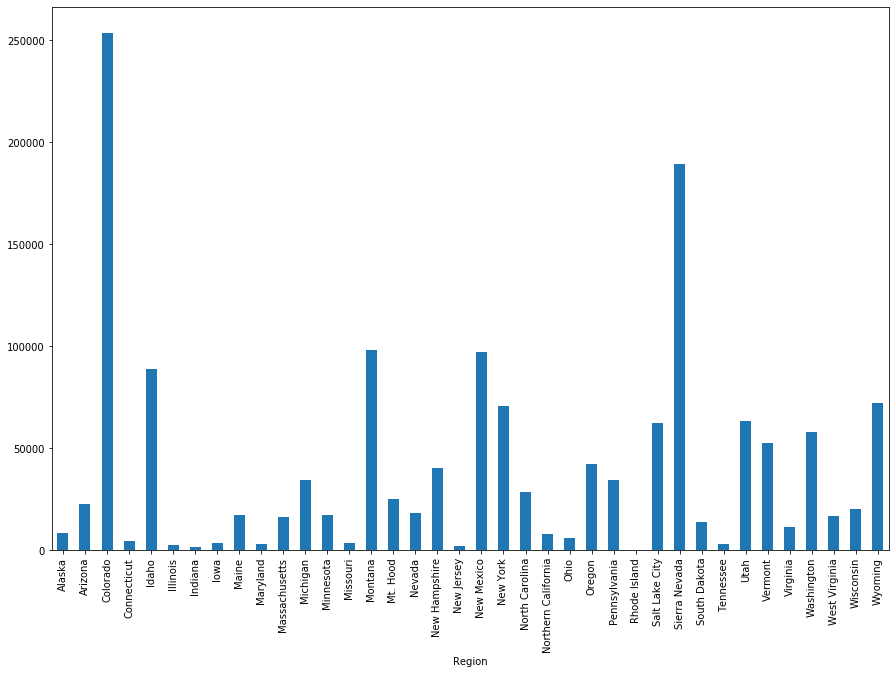

In [37]:
dfg['summit_elev'].plot.bar(figsize=(15, 10))

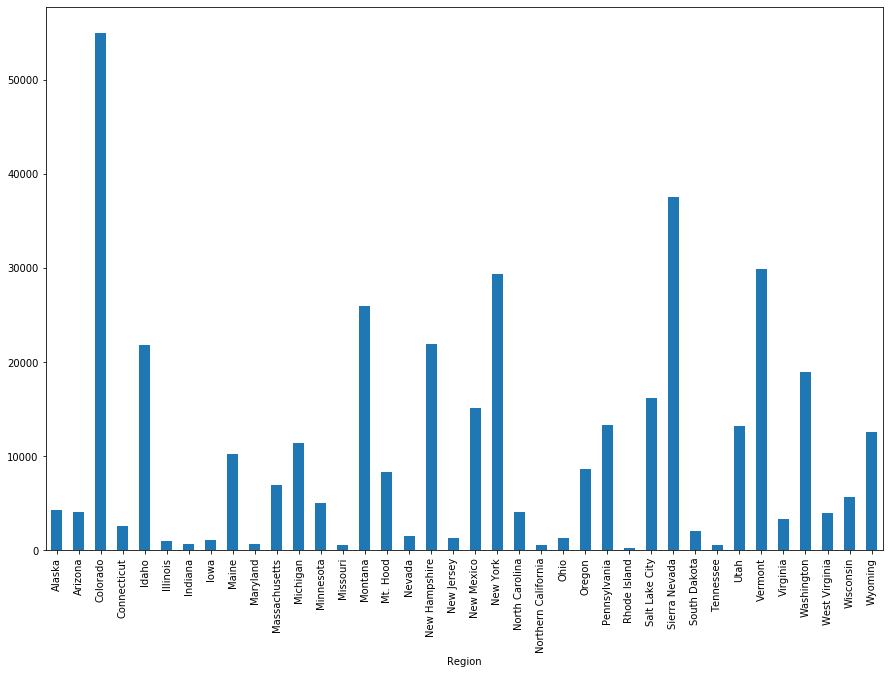

In [38]:
dfg['vertical_drop'].plot.bar(figsize=(15, 10))

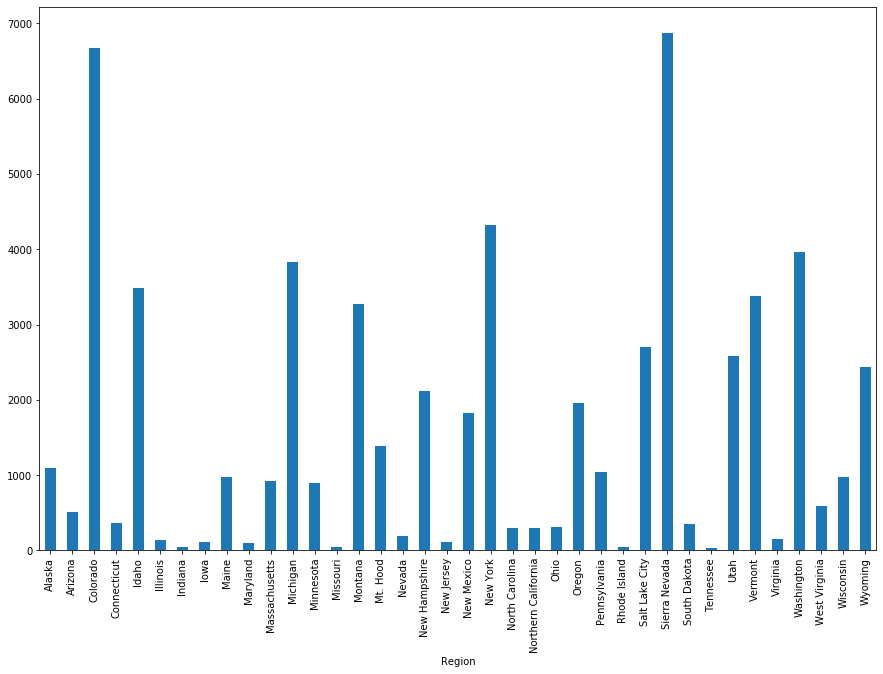

In [39]:
dfg['averageSnowfall'].plot.bar(figsize=(15, 10))

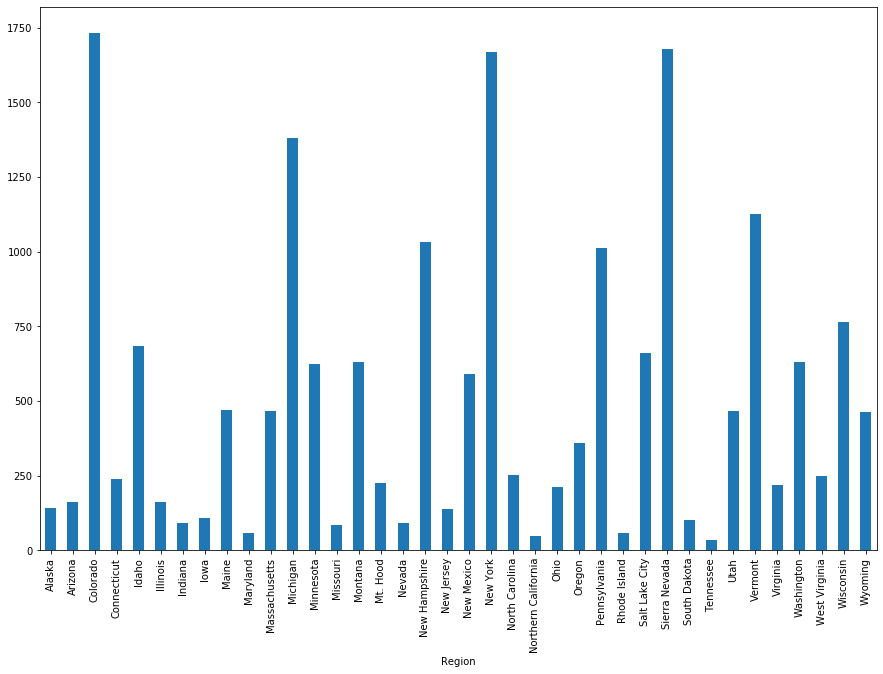

In [53]:
dfg['AdultWeekday'].plot.bar(figsize=(15, 10))

In [41]:
df_mon=df[df['Region']=='Montana']

In [43]:
df_mon

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
140,140,Big Sky Resort,Montana,Montana,11166,4350,7500,1,1.0,2,...,6.0,5800.0,400.0,144.000000,46.0,400.0,57.916957,64.16681,144.000000,0.0
141,141,Blacktail Mountain Ski Area,Montana,Montana,6676,1440,5236,0,0.0,0,...,0.7,1000.0,0.0,115.103943,21.0,250.0,42.000000,42.00000,120.053004,0.0
142,142,Bridger Bowl,Montana,Montana,8700,2600,6100,0,0.0,0,...,1.5,2000.0,100.0,122.000000,64.0,350.0,63.000000,63.00000,133.000000,0.0
143,143,Discovery Ski Area,Montana,Montana,8150,2380,5770,0,0.0,0,...,1.5,2400.0,25.0,116.000000,46.0,225.0,49.000000,49.00000,116.000000,0.0
144,144,Great Divide,Montana,Montana,7330,1580,5750,0,0.0,0,...,3.0,1600.0,150.0,94.000000,78.0,180.0,48.000000,48.00000,100.000000,100.0
145,145,Lost Trail - Powder Mtn,Montana,Montana,8200,1800,6400,0,0.0,0,...,2.5,1800.0,0.0,84.000000,81.0,325.0,46.000000,46.00000,80.000000,0.0
146,146,Maverick Mountain,Montana,Montana,8520,2020,6500,0,0.0,0,...,1.3,255.0,0.0,115.103943,83.0,160.0,39.000000,39.00000,120.053004,0.0
147,147,Montana Snowbowl,Montana,Montana,7600,2600,5000,0,0.0,0,...,1.2,950.0,20.0,115.103943,58.0,300.0,50.000000,50.00000,120.053004,10.0
148,148,Red Lodge Mountain,Montana,Montana,9416,2400,7016,0,0.0,0,...,2.5,1635.0,496.0,142.000000,59.0,250.0,67.000000,67.00000,136.000000,0.0
149,149,Showdown Montana,Montana,Montana,8200,1400,6800,0,0.0,0,...,1.8,640.0,0.0,86.000000,83.0,250.0,47.000000,47.00000,85.000000,0.0


In [47]:
df_mon.set_index('Name')

,Unnamed: 0,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Name,,,,,,,,,,,,,,,,,,,,,
Big Sky Resort,140,Montana,Montana,11166,4350,7500,1,1.0,2,5,...,6.0,5800.0,400.0,144.000000,46.0,400.0,57.916957,64.16681,144.000000,0.0
Blacktail Mountain Ski Area,141,Montana,Montana,6676,1440,5236,0,0.0,0,0,...,0.7,1000.0,0.0,115.103943,21.0,250.0,42.000000,42.00000,120.053004,0.0
Bridger Bowl,142,Montana,Montana,8700,2600,6100,0,0.0,0,0,...,1.5,2000.0,100.0,122.000000,64.0,350.0,63.000000,63.00000,133.000000,0.0
Discovery Ski Area,143,Montana,Montana,8150,2380,5770,0,0.0,0,0,...,1.5,2400.0,25.0,116.000000,46.0,225.0,49.000000,49.00000,116.000000,0.0
Great Divide,144,Montana,Montana,7330,1580,5750,0,0.0,0,0,...,3.0,1600.0,150.0,94.000000,78.0,180.0,48.000000,48.00000,100.000000,100.0
Lost Trail - Powder Mtn,145,Montana,Montana,8200,1800,6400,0,0.0,0,0,...,2.5,1800.0,0.0,84.000000,81.0,325.0,46.000000,46.00000,80.000000,0.0
Maverick Mountain,146,Montana,Montana,8520,2020,6500,0,0.0,0,0,...,1.3,255.0,0.0,115.103943,83.0,160.0,39.000000,39.00000,120.053004,0.0
Montana Snowbowl,147,Montana,Montana,7600,2600,5000,0,0.0,0,0,...,1.2,950.0,20.0,115.103943,58.0,300.0,50.000000,50.00000,120.053004,10.0
Red Lodge Mountain,148,Montana,Montana,9416,2400,7016,0,0.0,0,2,...,2.5,1635.0,496.0,142.000000,59.0,250.0,67.000000,67.00000,136.000000,0.0


In [48]:
df_mon.columns

Index(['Unnamed: 0', 'Name', 'Region', 'state', 'summit_elev', 'vertical_drop',
       'base_elev', 'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

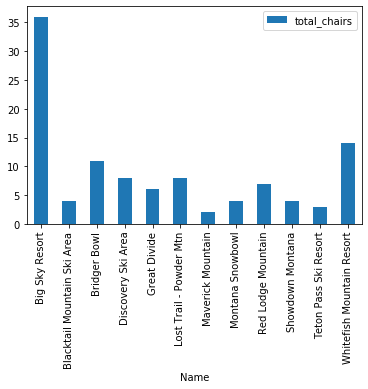

In [51]:
df_mon.plot(x='Name',y='total_chairs',kind='bar')

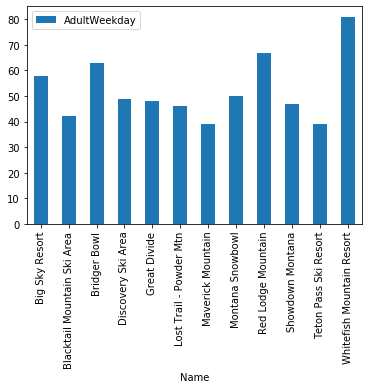

In [54]:
df_mon.plot(x='Name',y='AdultWeekday',kind='bar')